In [1]:
%load_ext autoreload

In [12]:
#coding=utf-8
%autoreload
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
import numpy as np
from  EIOptimizer import EIOptimizer
%matplotlib inline

In [26]:
N = 200
X = np.random.rand(N , 2)*5
X.shape
y = np.sin(X[:, 0]*5)*np.cos(X[:, 1]*1.5) + 0.1*np.random.randn(N ) # toy function

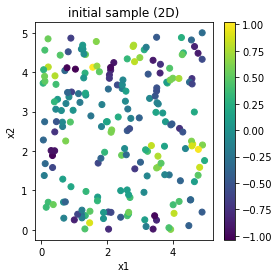

In [30]:
plt.figure(figsize = (4, 4))
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.colorbar()
plt.title('initial sample (2D)')
plt.xlabel('x1')
plt.ylabel('x2')

In [31]:
EIOpt = EIOptimizer()

In [32]:
EIOpt.fit(X, y, bounds = [(0, 5), (0, 5)], num_restarts=10)

In [33]:
x1, x2 = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 50))

In [34]:
ys = EIOpt.y_scaler.inverse_transform(EIOpt.gp_model.predict(np.hstack((x1.reshape(-1, 1), x2.reshape(-1, 1))))[0])

In [35]:
EIOpt.gp_model

GP_regression.,value,constraints,priors
rbf.variance,1.84537222893,"0.001,100.0",
rbf.lengthscale,"(2,)","0.001,10.0",
Gaussian_noise.variance,0.0414455225102,"0.0001,10.0",


In [36]:
EIOpt.gp_model.kern.lengthscale

index,GP_regression.rbf.lengthscale,constraints,priors
[0],0.06150307,"0.001,10.0",
[1],0.19577301,"0.001,10.0",


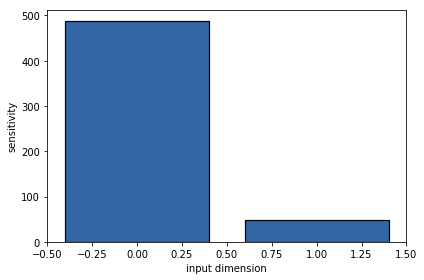

In [37]:
EIOpt.gp_model.kern.plot_ARD()

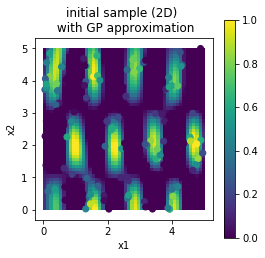

In [42]:
plt.figure(figsize = (4, 4))
plt.imshow(ys.reshape(50, 50), extent=[0,5,0,5], origin='min')
plt.clim([0, 1])
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.clim([0, 1])
plt.colorbar()
plt.title('initial sample (2D) \n with GP approximation')
plt.xlabel('x1')
plt.ylabel('x2')

In [45]:
sampled = EIOpt.sample(100)

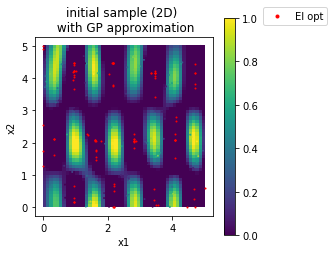

In [49]:
plt.figure(figsize = (4, 4))
plt.imshow(ys.reshape(50, 50), extent=[0,5,0,5], origin='min')
plt.clim([0, 1])
plt.scatter(X[:, 0], X[:, 1], c = y, s = 1)
plt.clim([0, 1])
plt.colorbar()
plt.scatter(sampled[:, 0], sampled[:, 1], color = 'r', s = 1, label = 'EI opt')
plt.legend(loc = 2, bbox_to_anchor = (1.25, 1.2), markerscale = 3.)
plt.title('initial sample (2D) \n with GP approximation')
plt.xlabel('x1')
plt.ylabel('x2')